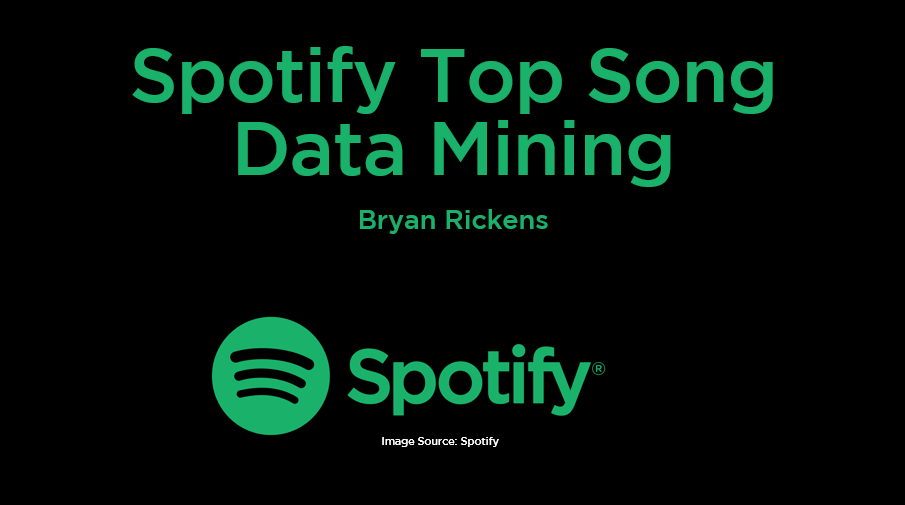

# Table of Contents:

# 1) Pre-Processing
# 2) Predicting Genre with Decision Trees
# 3) Predicting Genre with Logistic Regression
# 4) Predicting Genre with K-Nearest Neighbors
# 5) Predicting Genre with Support Vector Machines
# 6) Various Insights/Visualizations 
# 7) Conclusion

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('https://raw.githubusercontent.com/BryanRickens/Portfolio/main/Spotify%202010%20-%202019%20Top%20100.csv')

## 1) Preprocessing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


### It seems like there are 3 empty rows given the above output.

In [32]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


### It's also apparent that there's a song somehow from 1975 in the dataset.

In [33]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's take care of the empty rows and then investigate the song from 1975.

In [34]:
# Clean up discrepancies 

# First, the 3 empty rows
df = df.drop(index = [1000,1001,1002])

In [35]:
df.loc[df['year released'] == 1975]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975.0,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019.0,Band/Group


### Now that we see it's a remaster from 2011, let's update that.

In [36]:
# Change the "1975" year released to its correct "2011" year
df['year released'].mask(df['year released'] == 1975, 2011, inplace=True)

### Since we are trying to predict genre, let's see the different types

In [37]:
print(df['top genre'].unique())
print(df['top genre'].value_counts())

['dance pop' 'pop soul' 'atl hip hop' 'pop rap' 'big room'
 'canadian hip hop' 'disco house' 'romanian house' 'lilith'
 'detroit hip hop' 'asian american hip hop' 'east coast hip hop'
 'neo mellow' 'canadian pop' 'reggae fusion' 'idol' 'art pop' 'hip hop'
 'pop' 'talent show' 'modern alternative rock' 'indietronica' 'grime'
 'barbadian pop' 'acoustic pop' 'dutch house' 'belgian pop'
 'contemporary country' 'boy band' 'celtic rock' 'edm' 'indie rock'
 'australian dance' 'british soul' 'eau claire indie' 'dancefloor dnb'
 'permanent wave' 'hip pop' 'g funk' 'baroque pop' 'indie pop'
 'chicago rap' 'indie poptimism' 'french shoegaze' 'alternative metal'
 'indie folk' 'alternative rock' 'uk hip hop' 'electro house'
 'garage rock' 'israeli pop' 'alternative r&b' 'australian pop'
 'candy pop' 'modern rock' 'conscious hip hop' 'folk-pop'
 'alternative dance' 'k-pop' 'gangster rap' 'brostep' 'downtempo'
 'la indie' 'bass trap' 'metropopolis' 'electropop' 'electro'
 'destroy techno' 'emo' 'aust

### Not only are there too many specific genres, but there are too many genres with only one song in the dataset (and classification models need a minimum of 2).
### Let's combine the genres that make sense to. 

In [38]:
# First, create a subgenre column for those original values just in case.
df['subgenre'] = df['top genre']

# Now, create a "main genre" where we will replace these values.
df['main genre'] = df['top genre']
df = df.drop(columns=['top genre'])

### Combine the specific subgenres into a main one (for example, all variations of pop can be combined). Do this by searching for genres containing these words.

In [39]:
df.loc[df['subgenre'].str.contains("hip hop"),'main genre'] = 'hip hop'
df.loc[df['subgenre'].str.contains("house"),'main genre'] = 'house'
df.loc[df['subgenre'].str.contains("dance"),'main genre'] = 'dance'
df.loc[df['subgenre'].str.contains("rap"),'main genre'] = 'rap'
df.loc[df['subgenre'].str.contains("rock"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("pop"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("indie"),'main genre'] = 'indie'
df.loc[df['subgenre'].str.contains("country"),'main genre'] = 'country'
df.loc[df['subgenre'].str.contains("electro"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("soul"),'main genre'] = 'soul'
df.loc[df['subgenre'].str.contains("folk"),'main genre'] = 'folk'
df.loc[df['subgenre'].str.contains("afro"),'main genre'] = 'afro'
df.loc[df['subgenre'].str.contains("r&b"),'main genre'] = 'r&b'

# Using domain knowledge, combine the more abstract/specific genres into their respective parent genre.
df.loc[df['subgenre'].str.contains("dark clubbing"),'main genre'] = 'dance'
df.loc[df['subgenre'].str.contains("destroy techno"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("complextro"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("australian psych"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("black americana"),'main genre'] = 'folk'
df.loc[df['subgenre'].str.contains("uk drill"),'main genre'] = 'rap'
df.loc[df['subgenre'].str.contains("basshall"),'main genre'] = 'afro'
df.loc[df['subgenre'].str.contains("big room"),'main genre'] = 'dance'
df.loc[df['subgenre'].str.contains("lilith"),'main genre'] = 'folk'
df.loc[df['subgenre'].str.contains("reggae fusion"),'main genre'] = 'hip hop'
df.loc[df['subgenre'].str.contains("idol"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("grime"),'main genre'] = 'hip hop'
df.loc[df['subgenre'].str.contains("edm"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("permanent wave"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("g funk"),'main genre'] = 'rap'
df.loc[df['subgenre'].str.contains("french shoegaze"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("alternative metal"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("brostep"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("downtempo"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("emo"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("adult standards"),'main genre'] = 'rock'
df.loc[df['subgenre'].str.contains("comic"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("aussietronica"),'main genre'] = 'electro'
df.loc[df['subgenre'].str.contains("irish singer-songwriter"),'main genre'] = 'indie'
df.loc[df['subgenre'].str.contains("new french touch"),'main genre'] = 'house'
df.loc[df['subgenre'].str.contains("australian psych"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("alt z"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("neo mellow"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("boy band"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("hollywood"),'main genre'] = 'pop'
df.loc[df['subgenre'].str.contains("talent show"),'main genre'] = 'pop'

# Lastly, there seems to be an intentional delineation between "dance pop" and "pop" 
# that I want to preserve (dance pop almost a third of the dataset). 
# Next, I am going to assess why that is and then determine if it makes sense to
# combine them nonetheless.
df.loc[df['subgenre'].str.contains("dance pop"),'main genre'] = 'dance pop'


In [40]:
df[['title','main genre','subgenre']]

,title,main genre,subgenre
0,STARSTRUKK (feat. Katy Perry),dance pop,dance pop
1,My First Kiss (feat. Ke$ha),dance pop,dance pop
2,I Need A Dollar,soul,pop soul
3,Airplanes (feat. Hayley Williams of Paramore),hip hop,atl hip hop
4,Nothin' on You (feat. Bruno Mars),hip hop,atl hip hop
...,...,...,...
995,SICKO MODE,hip hop,hip hop
996,EARFQUAKE,hip hop,hip hop
997,Boasty (feat. Idris Elba),hip hop,grime
998,Strike a Pose (feat. Aitch),afro,afroswing


In [41]:
df['main genre'].unique()

array(['dance pop', 'soul', 'hip hop', 'pop', 'dance', 'house', 'folk',
       'rock', 'indie', 'country', 'electro', 'rap', 'r&b', 'latin',
       'afro'], dtype=object)

In [42]:
df['main genre'].value_counts()

dance pop    361
pop          199
hip hop      134
rap           58
rock          57
electro       44
dance         28
indie         28
folk          21
r&b           16
country       14
soul          12
house         11
latin         10
afro           7
Name: main genre, dtype: int64

### Now that the genres are trimmed down, we can proceed. But first, we notice that "dance pop" and "pop" are the two highest -- is there a major difference between them?

### Let's run some statistical tests between dance pop and pop to see if (and what) distinguishes them. 

In [43]:
from scipy import stats
dance_pop = df.loc[df['main genre']== 'dance pop']
pop = df.loc[df['main genre'] == 'pop']

#BPM
dance_popBPM = dance_pop['bpm']
popBPM = pop['bpm']

#Energy
dance_popNRGY = dance_pop['nrgy']
popNRGY = pop['nrgy']

#Danceability
dance_popDNCE = dance_pop['dnce']
popDNCE = pop['dnce']

#Happiness 
dance_popVAL = dance_pop['val']
popVAL = pop['val']

#Vocal
dance_popSPCH = dance_pop['spch']
popSPCH = pop['spch']

#Popularity
dance_popPOP = dance_pop['pop']
popPOP = pop['pop']

# First, we have to test the normality assumption 
print("Dance Pop BPM Normality", stats.shapiro(dance_popBPM))
print("Pop BPM Normality ", stats.shapiro(popBPM))

print("\nDance Pop Energy Normality", stats.shapiro(dance_popNRGY))
print("Pop Energy Normality ", stats.shapiro(popNRGY)) 

print("\nDance Pop Danceability Normality", stats.shapiro(dance_popDNCE))
print("Pop Danceability Normality ", stats.shapiro(popDNCE)) 

print("\nDance Pop Happiness  Normality", stats.shapiro(dance_popVAL))
print("Pop Happiness  Normality ", stats.shapiro(popVAL)) 

print("\nDance Pop Vocal Normality", stats.shapiro(dance_popSPCH))
print("Pop Vocal Normality ", stats.shapiro(popSPCH)) 

print("\nDance Pop Popularity Normality", stats.shapiro(dance_popPOP))
print("Pop Popularity Normality ", stats.shapiro(popPOP)) 



Dance Pop BPM Normality ShapiroResult(statistic=0.9586805105209351, pvalue=1.5063374547708008e-08)
Pop BPM Normality  ShapiroResult(statistic=0.968774139881134, pvalue=0.00020829123968724161)

Dance Pop Energy Normality ShapiroResult(statistic=0.9667571783065796, pvalue=2.5086382038352895e-07)
Pop Energy Normality  ShapiroResult(statistic=0.95400071144104, pvalue=4.925338998873485e-06)

Dance Pop Danceability Normality ShapiroResult(statistic=0.9778753519058228, pvalue=2.4380746253882535e-05)
Pop Danceability Normality  ShapiroResult(statistic=0.9627941846847534, pvalue=4.2051404307130724e-05)

Dance Pop Happiness  Normality ShapiroResult(statistic=0.9792447686195374, pvalue=4.6113804273772985e-05)
Pop Happiness  Normality  ShapiroResult(statistic=0.9746798276901245, pvalue=0.001155275502242148)

Dance Pop Vocal Normality ShapiroResult(statistic=0.7371635437011719, pvalue=1.6676502181432275e-23)
Pop Vocal Normality  ShapiroResult(statistic=0.6728753447532654, pvalue=2.0749872194802155e

### Seeing that they are normal, we now test the assumption for equal variances. 

In [44]:
#BPM
print("(BPM)", stats.levene(dance_popBPM, popBPM))
#Energy
print("(Energy)", stats.levene(dance_popNRGY, popNRGY))
#Danceability
print("(Danceability)", stats.levene(dance_popDNCE, popDNCE ))
#Happiness
print("(Happiness)", stats.levene(dance_popVAL,popVAL ))
#Vocal
print("(Vocal)", stats.levene(dance_popSPCH,popSPCH ))
#Popularity 
print("(Popularity)", stats.levene(dance_popPOP,popPOP ))

(BPM) LeveneResult(statistic=4.437073097787551, pvalue=0.03561239832888938)
(Energy) LeveneResult(statistic=17.22392675008155, pvalue=3.841188610599276e-05)
(Danceability) LeveneResult(statistic=2.168610420182693, pvalue=0.14141726863638424)
(Happiness) LeveneResult(statistic=1.6436669924178835, pvalue=0.2003554806490422)
(Vocal) LeveneResult(statistic=0.004111891262226723, pvalue=0.948894432364115)
(Popularity) LeveneResult(statistic=0.14146502068085842, pvalue=0.7069718623943713)


### Equal variances are not assumed for BPM and Energy. Let's continue.

In [45]:
print("BPM", stats.ttest_ind(dance_popBPM, popBPM, equal_var=False))
print("Energy", stats.ttest_ind(dance_popNRGY, popNRGY, equal_var=False))
print("Danceability", stats.ttest_ind(dance_popDNCE, popDNCE, equal_var=True))
print("Happiness", stats.ttest_ind(dance_popVAL, popVAL, equal_var=True))
print("Vocal", stats.ttest_ind(dance_popSPCH, popSPCH, equal_var=True))
print("Popularity ", stats.ttest_ind(dance_popPOP, popPOP, equal_var=True))

BPM Ttest_indResult(statistic=0.03964077069932105, pvalue=0.9684015749222706)
Energy Ttest_indResult(statistic=4.939972431970816, pvalue=1.2583847547701898e-06)
Danceability Ttest_indResult(statistic=1.7067536686477658, pvalue=0.08842420193890169)
Happiness Ttest_indResult(statistic=2.2302163899279406, pvalue=0.026129992783051753)
Vocal Ttest_indResult(statistic=0.776731297301671, pvalue=0.43764644753145177)
Popularity  Ttest_indResult(statistic=-2.612053436493113, pvalue=0.00924238056383602)


### It appears that Energy, Happiness, Popularity, and Danceability (at an alpha = 0.10) are different between Dance Pop and Pop.

### Since there were enough differences, I will keep them separate. However, I still have my suspcions about how the model will deal with the two.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

### Now let's go through the process of encoding our features and building the dataframes to be used in modeling.

In [46]:
# Let's trim our dataframe for testing

# Save a backup master dataframe
dfMaster = df

# Drop unnecessary features
df = df.drop(columns=['title','added','top year'])

# Save the names of the genres and artists
genre_title = np.sort(dfMaster['main genre'].unique())
artist_title = np.sort(dfMaster['artist'].unique())

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='error',drop='first')

# Encode all the categorical variables
dfA = pd.DataFrame(ohe.fit_transform(df[['artist']]), columns = ohe.get_feature_names(['arist']))
dfT = pd.DataFrame(ohe.fit_transform(df[['artist type']]), columns = ohe.get_feature_names(['artist type']))
dfMG = pd.DataFrame(ohe.fit_transform(df[['main genre']]), columns = ohe.get_feature_names(['main genre']))
dfSG = pd.DataFrame(ohe.fit_transform(df[['subgenre']]), columns = ohe.get_feature_names(['subgenre']))
dfYR = pd.DataFrame(ohe.fit_transform(df[['year released']]), columns = ohe.get_feature_names(['year released']))

In [48]:
### Dataframes to predict GENRE 

# Including artists
dfG1 = df
dfG1 = pd.concat([dfG1, dfA], axis = 1)
dfG1 = pd.concat([dfG1, dfT], axis = 1)
dfG1 = pd.concat([dfG1, dfYR], axis = 1)
dfG1 = dfG1.drop(columns=['artist','artist type','subgenre', 'year released'])

# Excluding artists (only song measurements)
dfG2 = df
dfG2 = pd.concat([dfG2, dfT], axis = 1)
dfG2 = dfG2.drop(columns=['artist','artist type','subgenre', 'year released'])


## 2) Predicting Genre Through Decision Trees

Decision Tree Report

              precision    recall  f1-score   support

        afro       0.00      0.00      0.00         2
     country       0.29      0.40      0.33         5
       dance       0.38      0.33      0.35         9
   dance pop       0.55      0.73      0.63       119
     electro       0.80      0.27      0.40        15
        folk       0.50      0.14      0.22         7
     hip hop       0.30      0.30      0.30        44
       house       1.00      0.00      0.00         4
       indie       0.00      0.00      0.00         9
       latin       0.00      0.00      0.00         3
         pop       0.49      0.50      0.50        66
         r&b       1.00      0.40      0.57         5
         rap       0.53      0.42      0.47        19
        rock       0.45      0.26      0.33        19
        soul       0.50      0.25      0.33         4

    accuracy                           0.48       330
   macro avg       0.45      0.27      0.30       330
weig

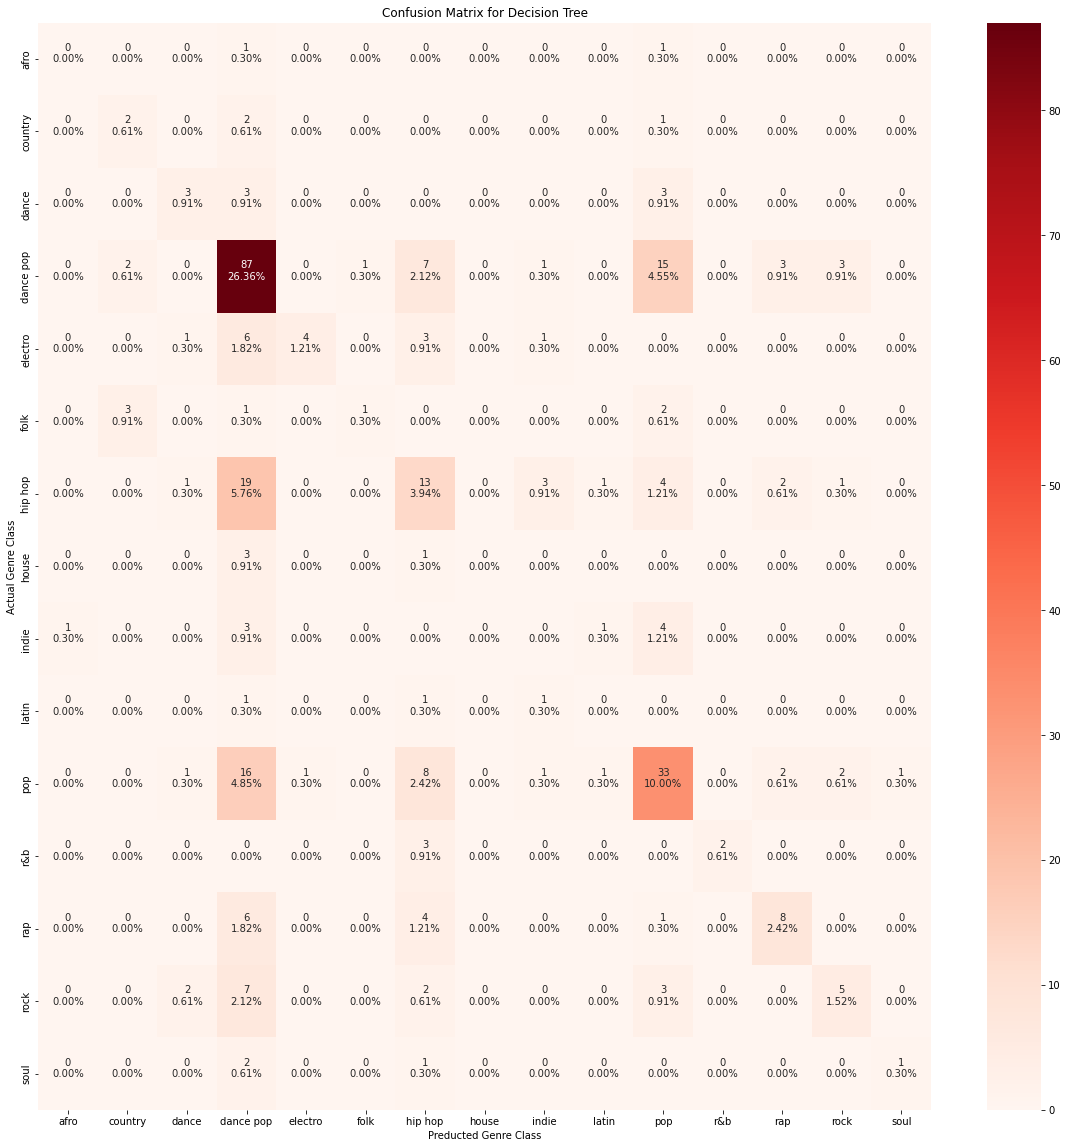

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()

#We need to scale the feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# We need to encode Genre
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Split our features and our Genre values
X = dfG1.drop(columns=['main genre'])
y = dfG1['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.33, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DTG1 = model.score(X_test,y_test)

print('Decision Tree Report\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Reds')
ax.set_title('Confusion Matrix for Decision Tree')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### Although this could be improved upon with pre and post pruning, the relatively low score suggests to me that I should first evaluate other models first to see how much better they fare.

## 3) Predicting Genre Through Logistic Regression

Logistic Regression Report

              precision    recall  f1-score   support

        afro       1.00      0.00      0.00         2
     country       1.00      0.60      0.75         5
       dance       1.00      0.67      0.80         9
   dance pop       0.67      0.99      0.80       119
     electro       1.00      0.47      0.64        15
        folk       1.00      0.29      0.44         7
     hip hop       0.95      0.86      0.90        44
       house       1.00      0.00      0.00         4
       indie       1.00      0.33      0.50         9
       latin       1.00      0.33      0.50         3
         pop       0.95      0.80      0.87        66
         r&b       1.00      0.60      0.75         5
         rap       1.00      0.79      0.88        19
        rock       1.00      0.68      0.81        19
        soul       1.00      1.00      1.00         4

    accuracy                           0.81       330
   macro avg       0.97      0.56      0.64       33

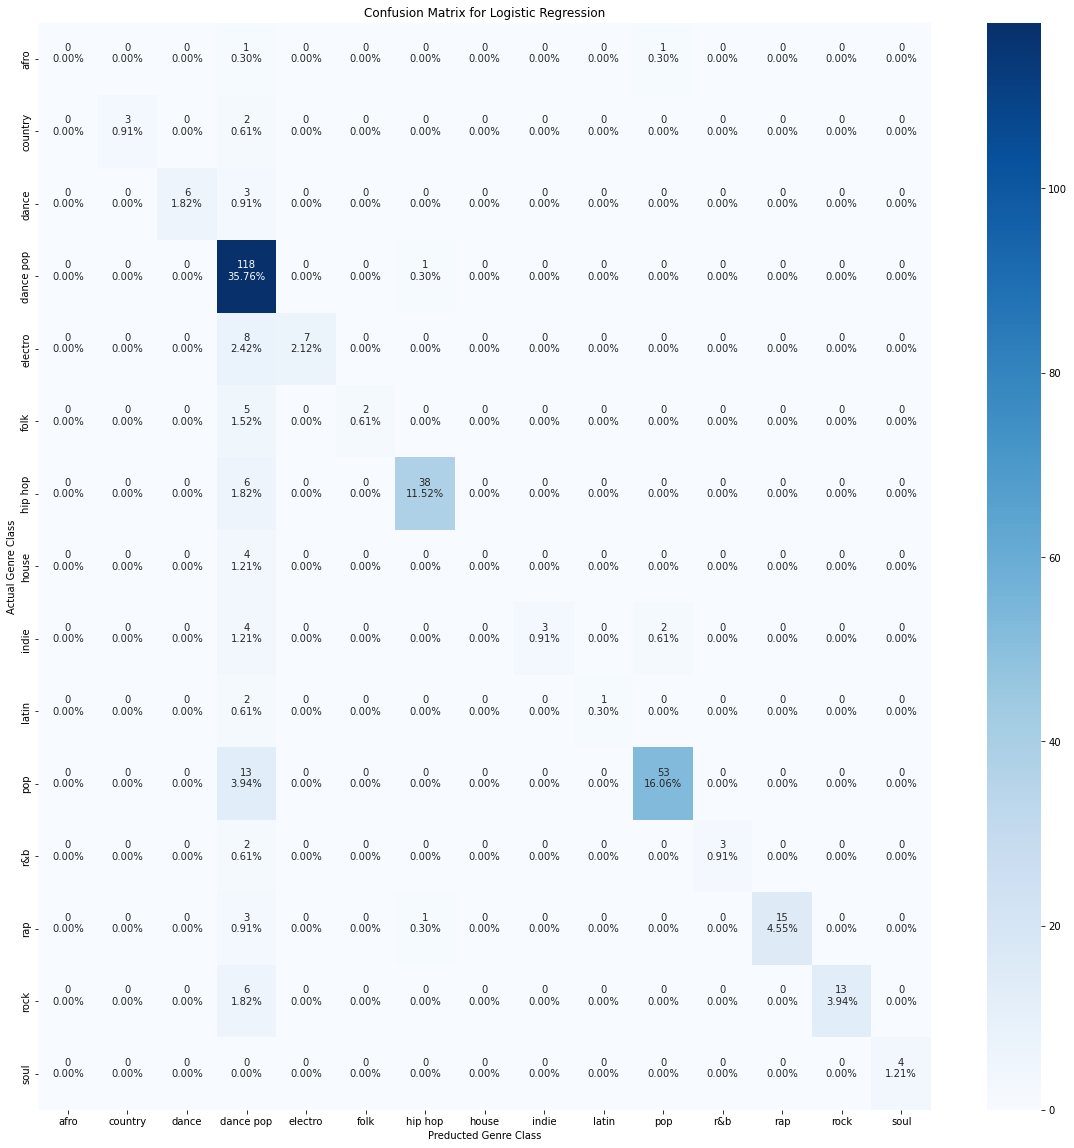

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=1000)

# Split our features and our Genre values
X = dfG1.drop(columns=['main genre'])
y = dfG1['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.33, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DTG1 = model.score(X_test,y_test)

print('Logistic Regression Report\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### Seeing the vast improvement, I am going to check a KNN model now and leave the Decision Tree behind.

## 4) Predicting Genre Through K-Nearest Neighbors

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best neighbor value:  {'n_neighbors': 1}
KNN Report

              precision    recall  f1-score   support

        afro       1.00      0.00      0.00         2
     country       1.00      0.60      0.75         5
       dance       1.00      0.67      0.80         9
   dance pop       1.00      0.76      0.86       119
     electro       1.00      0.47      0.64        15
        folk       1.00      0.29      0.44         7
     hip hop       0.35      0.98      0.51        44
       house       1.00      0.00      0.00         4
       indie       1.00      0.33      0.50         9
       latin       1.00      0.33      0.50         3
         pop       0.88      0.80      0.84        66
         r&b       1.00      0.60      0.75         5
         rap       1.00      0.79      0.88        19
        rock       1.00      0.68      0.81        19
        soul       1.00      1.00      1.00         4

    accuracy       

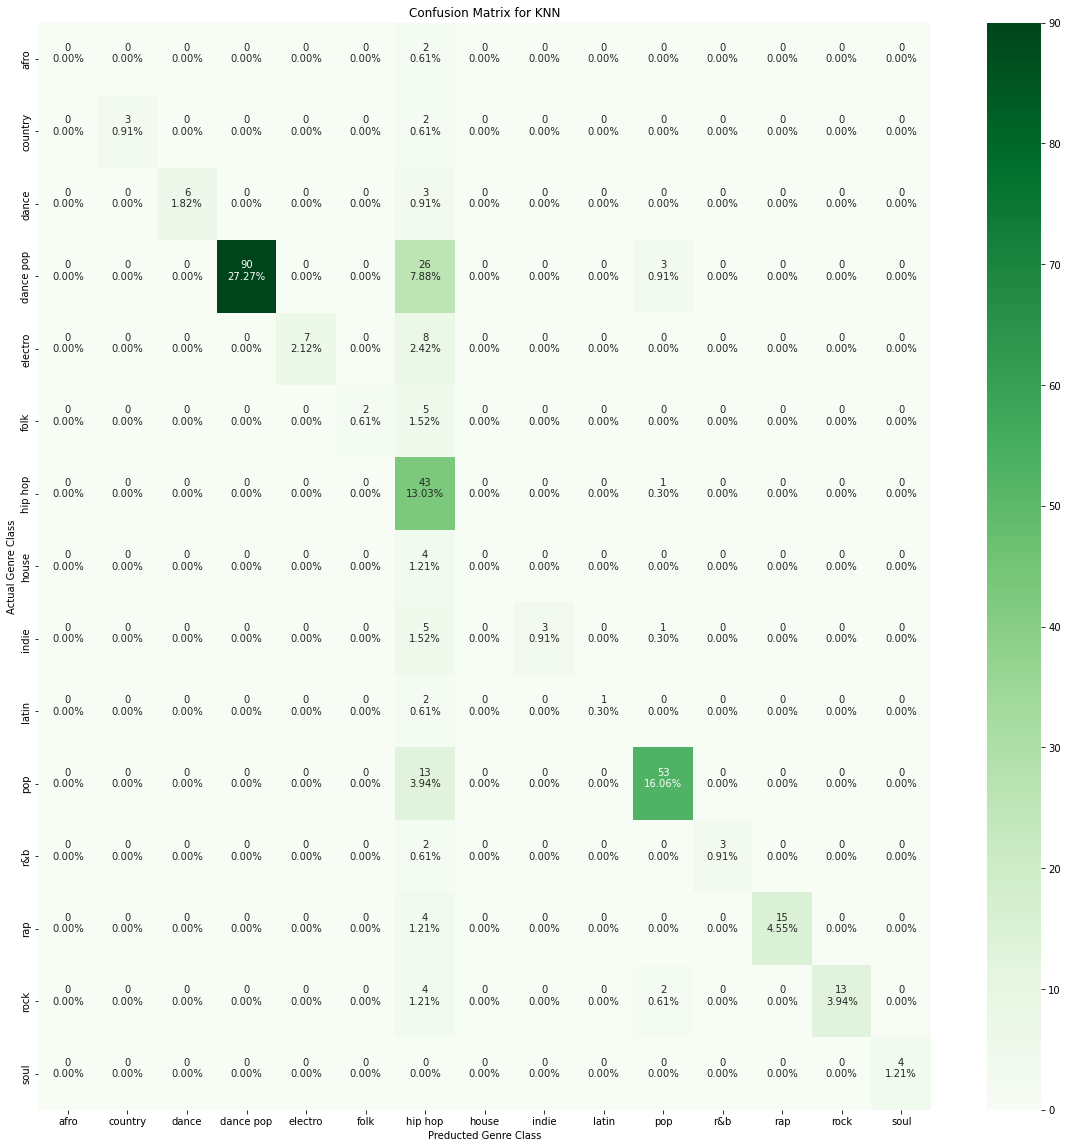

In [51]:
# Let's try KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

X = dfG1.drop(columns=['main genre'])
y = dfG1['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.33, stratify = y)

# Get a list of possible neighbor values
n = list(range(1,50))

# GridSearchCV will crossvalidate all possible neighbor values and pick the best one    
param_grid = dict(n_neighbors = n)
gscv = GridSearchCV(knn,param_grid,cv=5, scoring = 'accuracy', return_train_score = False, verbose = 1)
model = gscv.fit(X_train,y_train)
print("Best neighbor value: ", model.best_params_)
y_pred = model.predict(X_test)
KNNscore = model.score(X_test, y_test)

print('KNN Report\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Greens')
ax.set_title('Confusion Matrix for KNN')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### Interestingly, Hip-Hop exclusively struggled and was misclassifications repeatedly. Perhaps this genre lies clustered within all the others the most and has too many nearby neighbors.

## 5) Predicting Genre Through Support Vector Machines

SVC Report

              precision    recall  f1-score   support

        afro       1.00      0.00      0.00         2
     country       1.00      0.60      0.75         5
       dance       1.00      0.67      0.80         9
   dance pop       0.67      0.97      0.79       119
     electro       1.00      0.47      0.64        15
        folk       1.00      0.29      0.44         7
     hip hop       0.76      0.84      0.80        44
       house       1.00      0.00      0.00         4
       indie       1.00      0.33      0.50         9
       latin       1.00      0.33      0.50         3
         pop       1.00      0.80      0.89        66
         r&b       1.00      0.60      0.75         5
         rap       1.00      0.79      0.88        19
        rock       1.00      0.68      0.81        19
        soul       1.00      1.00      1.00         4

    accuracy                           0.79       330
   macro avg       0.96      0.56      0.64       330
weighted avg  

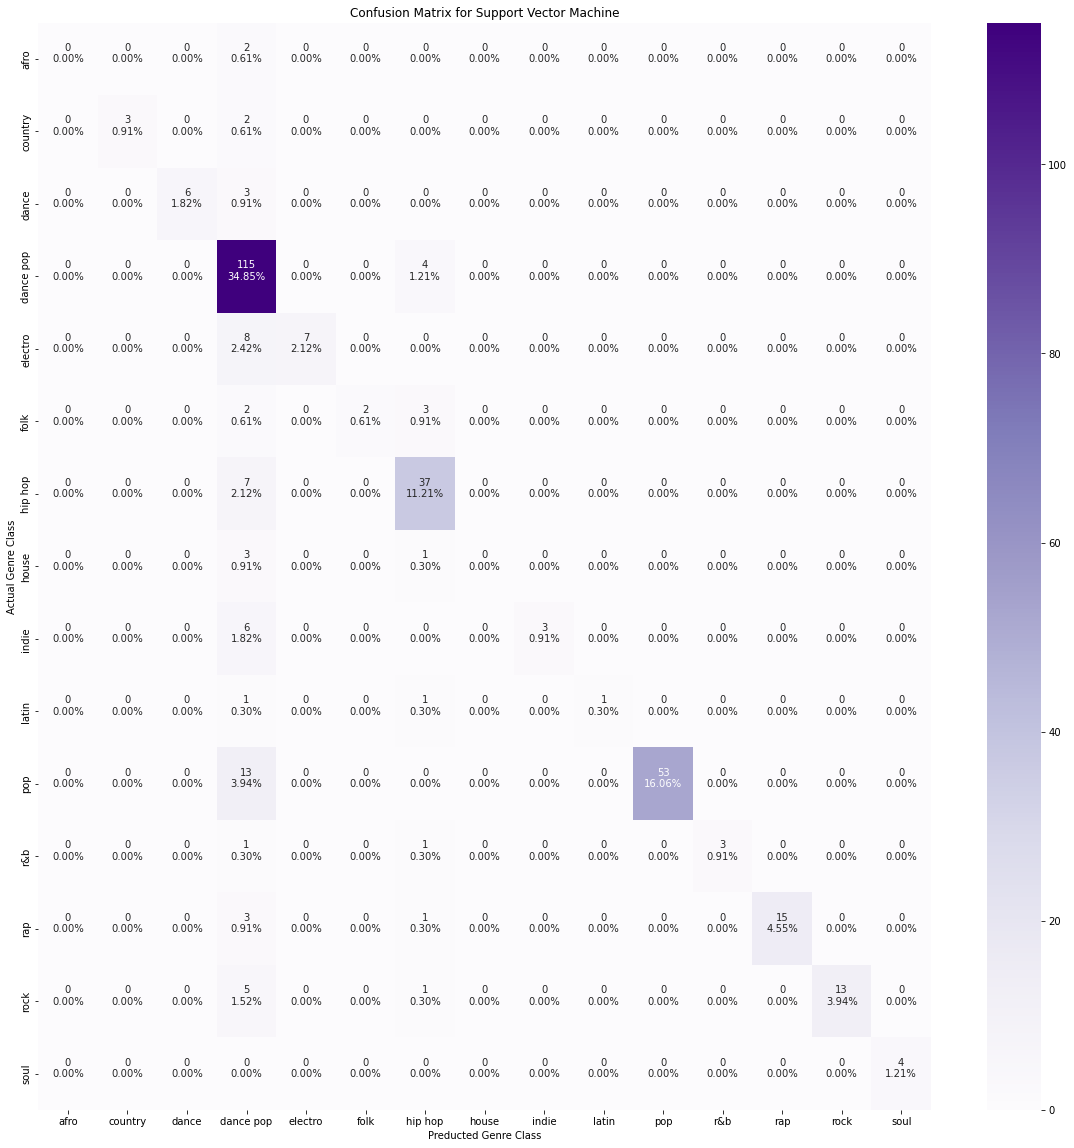

In [52]:
# Lastly, let's try a Support Vector Machine 
from sklearn.svm import SVC

model = SVC(kernel = 'linear')

X = dfG1.drop(columns=['main genre'])
y = dfG1['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.33, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVC1 = model.score(X_test,y_test)

print('SVC Report\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
ax.set_title('Confusion Matrix for Support Vector Machine')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### Again, it seems like Hip-Hop and this time Dance-Pop were not as seperable as the others. Perhaps their song measurement values (like BPM, Energy, Danceability, etc.) are just too similar.

### Considering this, I want to end by predicting Genre ONLY through these song measurements to see how it fares (perhaps the high scores previously could have been most attributed to values such as Artist -- knowing that most artists exlusively create music in single genres).

## 6) Various Insights/Visualizations

### Let's start with an SVC model using exclusively song measurements.

SVC Report for Song Measurements

              precision    recall  f1-score   support

        afro       1.00      0.00      0.00         2
     country       1.00      0.00      0.00         5
       dance       1.00      0.00      0.00         9
   dance pop       0.42      0.85      0.57       119
     electro       1.00      0.00      0.00        15
        folk       1.00      0.00      0.00         7
     hip hop       0.39      0.27      0.32        44
       house       1.00      0.00      0.00         4
       indie       1.00      0.00      0.00         9
       latin       1.00      0.00      0.00         3
         pop       0.37      0.27      0.31        66
         r&b       1.00      0.00      0.00         5
         rap       1.00      0.00      0.00        19
        rock       0.33      0.21      0.26        19
        soul       1.00      0.00      0.00         4

    accuracy                           0.41       330
   macro avg       0.83      0.11      0.10   

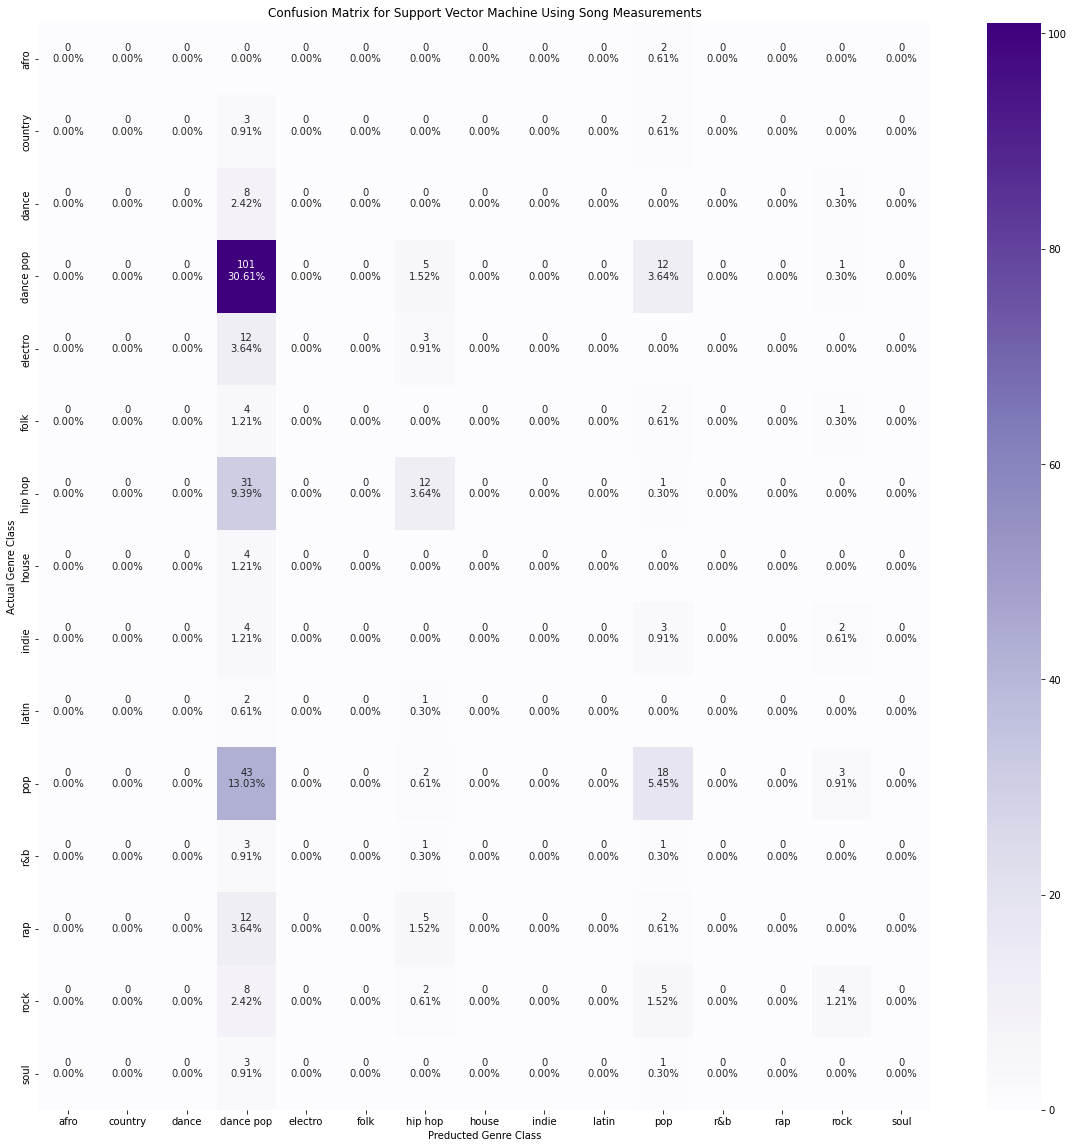

In [53]:
# SVC using Measurements

model = SVC(kernel = 'rbf')

X = dfG2.drop(columns=['main genre'])
y = dfG2['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size=0.33, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVC2 = model.score(X_test,y_test)

print('SVC Report for Song Measurements\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
ax.set_title('Confusion Matrix for Support Vector Machine Using Song Measurements')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### As I worried, it seems Dance Pop, Pop, Hip-Hop, and even Rock were not as separable in the model. It's interesting to note that every other genre had perfect classification scores -- but these ones specifically seem to have too "similar" measurements between them.

Logistic Regression Report

              precision    recall  f1-score   support

        afro       1.00      0.00      0.00         2
     country       1.00      0.00      0.00         5
       dance       1.00      0.00      0.00         9
   dance pop       0.42      0.85      0.57       119
     electro       1.00      0.00      0.00        15
        folk       1.00      0.00      0.00         7
     hip hop       0.39      0.27      0.32        44
       house       1.00      0.00      0.00         4
       indie       1.00      0.00      0.00         9
       latin       1.00      0.00      0.00         3
         pop       0.37      0.27      0.31        66
         r&b       1.00      0.00      0.00         5
         rap       1.00      0.00      0.00        19
        rock       0.33      0.21      0.26        19
        soul       1.00      0.00      0.00         4

    accuracy                           0.41       330
   macro avg       0.83      0.11      0.10       33

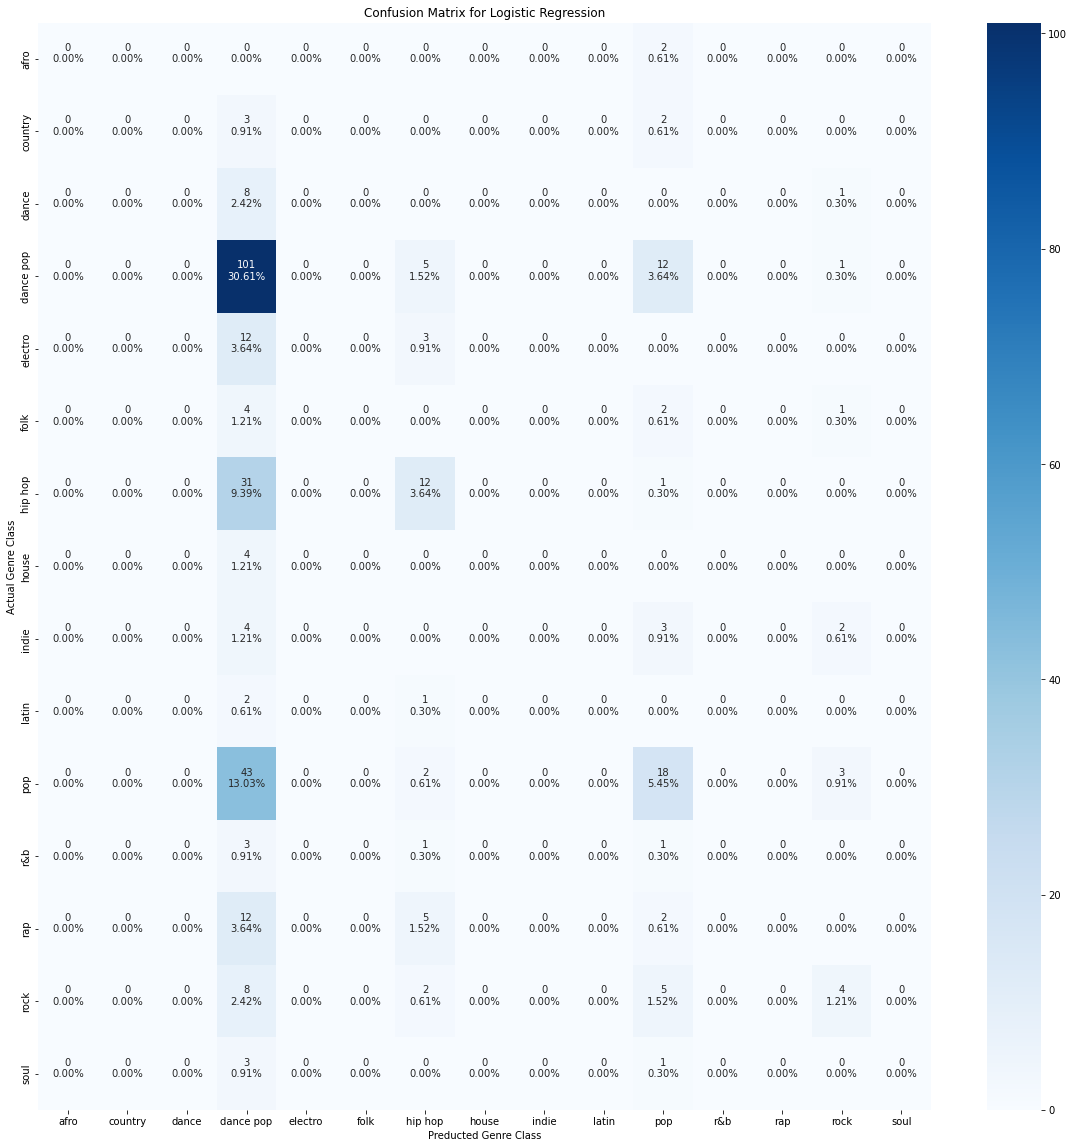

In [54]:
# Linear Regression using Measurements

# Split our features and our Genre values
X = dfG2.drop(columns=['main genre'])
y = dfG2['main genre']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size=0.33, stratify = y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DTG2 = model.score(X_test,y_test)

print('Logistic Regression Report\n')
print(classification_report(y_test,y_pred,target_names = genre_title, zero_division = 1))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (15 x 15 since 15 classes)
labels = np.asarray(labels).reshape(15,15)

# Ensure the plot is readable 
plt.figure(figsize = (20,20))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xlabel('Preducted Genre Class')
ax.set_ylabel('Actual Genre Class')
ax.xaxis.set_ticklabels(genre_title)
ax.yaxis.set_ticklabels(genre_title)
plt.show()

### We see the exact same thing here. Let's visualize these specific genres (Dance Pop, Pop, Hip-Hop, and Rock) and their respective measurements between one another.

In [55]:
combined = df.loc[(df['main genre'] == 'dance pop') | (df['main genre'] == 'pop') | 
       (df['main genre'] == 'hip hop') | (df['main genre'] == 'rock')]

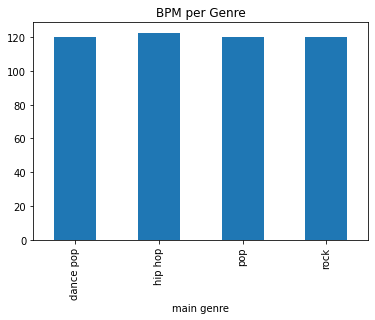

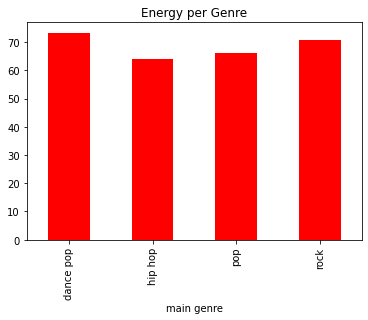

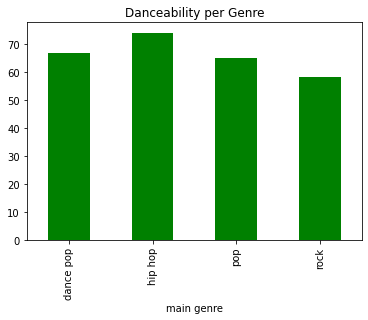

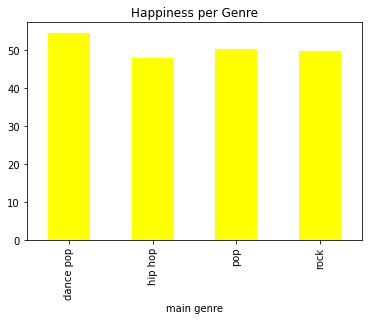

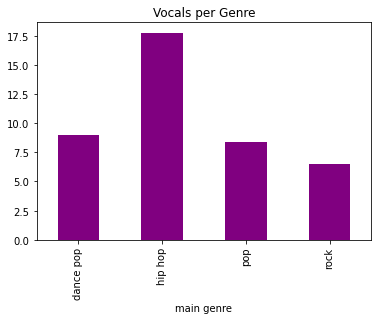

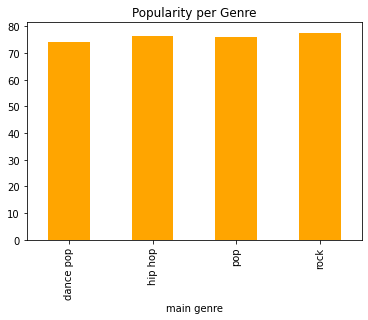

In [56]:
dfc1 = combined.groupby(['main genre'])['bpm'].mean()
dfc1.plot(kind = 'bar', title = 'BPM per Genre')
plt.show()

dfc2 = combined.groupby(['main genre'])['nrgy'].mean()
dfc2 = dfc2.plot(kind = 'bar', title = 'Energy per Genre', color = 'red')
plt.show()
dfc3 = combined.groupby(['main genre'])['dnce'].mean()
dfc3.plot(kind = 'bar', title = 'Danceability per Genre', color = 'green')
plt.show()
dfc4 = combined.groupby(['main genre'])['val'].mean()
dfc4.plot(kind = 'bar', title = 'Happiness per Genre', color = 'yellow')
plt.show()
dfc5 = combined.groupby(['main genre'])['spch'].mean()
dfc5.plot(kind = 'bar', title = 'Vocals per Genre', color = 'purple')
plt.show()
dfc6 = combined.groupby(['main genre'])['pop'].mean()
dfc6.plot(kind = 'bar', title = 'Popularity per Genre', color = 'orange')
plt.show()

### Beyond vocals (which makes sense for Hip-Hop to have a noticeable degree more), it is apparent that the genres are indeed incredibly similar when it comes to these song measurements. I believe most models constructed testing only these features will always struggle with these four. 

## 7) Conclusion

### Here are the main conclusions I have drawn from mining this dataset:

### - Initial genre values were way too specific and needed to be generalized and combined.
### - Decision Trees performed far worse than the other models.
### - Dataframes including Artist values seemed to slightly struggle with one or two genres each time (among Dance Pop, Pop, Hip Hop, and Rock).
### - Dataframes using exlusively song measurements struggled between ALL of the above genres each time, which I concluded was due to the similarity these genres had between the values. 

### It's interesting to note how similar the measurements are between these "popular" genres. This can be concluded that as far as pop radio goes, the sounds between them are becoming more homogenized.

